In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
import pickle
import codecs
import collections
import keras.preprocessing
from sklearn.model_selection import KFold
import csv

Using TensorFlow backend.


In [3]:
from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking
from keras_contrib.layers import CRF
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding,TimeDistributed,Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import GRU, Dropout
from keras.models import load_model
from keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking
from keras.layers.merge import Dot
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import sequence
from keras import backend as K
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers import Embedding,TimeDistributed,Flatten
from keras.layers import BatchNormalization,Dropout


In [4]:
import seaborn as sns
sns.set(style="darkgrid")

In [5]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})
#fill your code here

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [7]:
from pythainlp.sentiment import sentiment

In [8]:
input_nation = pd.read_csv('../../notebooks/Nation-tokenize.csv')

In [11]:
input_nation.drop('Unnamed: 0', axis=1, inplace=True)
# input_nation.drop('Unnamed: 0.1', axis=1,inplace=True)
# input_nation.drop('Unnamed: 1', axis=1, inplace=True)

In [12]:
input_nation.head()

,headline,date,DOW,time,view,like,share,comment,category,tag,content,hour,token,numToken,numChar
0,ไทยส่งทีมเยาวชนลุยศึกเชียร์ลีดดิ้งโลกที่สหรัฐฯ,05/04/2562,FRI,12:15,494,NaN,86,NaN,กีฬา,NaN,ที่ศูนย์วิทยาศาสตร์การกีฬา การกีฬาแห่งประเทศไท...,12,"ไทย,ทีม,เยาวชนลุยศึก,เชียร์,ลีด,ดิ้ง,โลก,สหรัฐฯ",8,40
1,"""บิ๊กโจ๊ก"" จ่อเรียก ""ปิยบุตร"" ให้ข้อมูล ปมถูกร้อง",05/04/2562,FRI,12:16,1250,NaN,797,NaN,อาชญากรรม,NaN,เมื่อเวลา 11.30 น. วันที่ 5 เมษายน ที่ สำนักงา...,12,"บิ๊กโจ๊ก,จ่อ,ปิยบุตร,ข้อมูล,ปม,ร้อง",6,30
2,"""ศศิน"" ชี้ ""เปรมชัย"" ต้องติดคุก จึงจะเหมาะสม",05/04/2562,FRI,12:06,755,NaN,354,NaN,คุณภาพชีวิต,NaN,ประธานมูลนิธิสืบนาคะเสถียร นายศศิน เฉลิมลาภ บอ...,12,"ศศิน,ชี้,เปรมชัย,ติด,คุก,เหมาะสม",6,27
3,จิตอาสาปรับปรุงภูมิทัศน์รอบ แหล่งน้ำศักดิ์สิทธิ์,05/04/2562,FRI,12:02,232,NaN,4,NaN,ภูมิภาค,NaN,นายทรงพล สวาสดิ์ธรรม ผู้ว่าราชการจังหวัดลำปาง ...,12,"จิตอาสา,ปรับปรุง,ภูมิทัศน์,รอบ,แหล่ง,น้ำ,ศักดิ...",7,47
4,คุณภาพน้ำ สงกรานต์คูเมืองเชียงใหม่ เกณฑ์พอใช้,05/04/2562,FRI,12:04,298,NaN,36,NaN,คุณภาพชีวิต,NaN,นายโสภณ ทองดี ผู้ตรวจราชการกระทรวงทรัพยากรธรรม...,12,"คุณภาพ,น้ำ,สงกรานต์,คูเมืองเชียงใหม่,เกณฑ์,พอใช้",6,43


In [13]:
input_nation.shape

(11794, 15)

In [14]:
input_nation['year-month'] = input_nation['date'].apply(lambda x : x.split('/')[2]+'-'+x.split('/')[1])
input_nation['month'] = input_nation['date'].apply(lambda x : x.split('/')[1])
input_nation['year'] = input_nation['date'].apply(lambda x : x.split('/')[2])

In [15]:
input_nation.head()

,headline,date,DOW,time,view,like,share,comment,category,tag,content,hour,token,numToken,numChar,year-month,month,year
0,ไทยส่งทีมเยาวชนลุยศึกเชียร์ลีดดิ้งโลกที่สหรัฐฯ,05/04/2562,FRI,12:15,494,NaN,86,NaN,กีฬา,NaN,ที่ศูนย์วิทยาศาสตร์การกีฬา การกีฬาแห่งประเทศไท...,12,"ไทย,ทีม,เยาวชนลุยศึก,เชียร์,ลีด,ดิ้ง,โลก,สหรัฐฯ",8,40,2562-04,04,2562
1,"""บิ๊กโจ๊ก"" จ่อเรียก ""ปิยบุตร"" ให้ข้อมูล ปมถูกร้อง",05/04/2562,FRI,12:16,1250,NaN,797,NaN,อาชญากรรม,NaN,เมื่อเวลา 11.30 น. วันที่ 5 เมษายน ที่ สำนักงา...,12,"บิ๊กโจ๊ก,จ่อ,ปิยบุตร,ข้อมูล,ปม,ร้อง",6,30,2562-04,04,2562
2,"""ศศิน"" ชี้ ""เปรมชัย"" ต้องติดคุก จึงจะเหมาะสม",05/04/2562,FRI,12:06,755,NaN,354,NaN,คุณภาพชีวิต,NaN,ประธานมูลนิธิสืบนาคะเสถียร นายศศิน เฉลิมลาภ บอ...,12,"ศศิน,ชี้,เปรมชัย,ติด,คุก,เหมาะสม",6,27,2562-04,04,2562
3,จิตอาสาปรับปรุงภูมิทัศน์รอบ แหล่งน้ำศักดิ์สิทธิ์,05/04/2562,FRI,12:02,232,NaN,4,NaN,ภูมิภาค,NaN,นายทรงพล สวาสดิ์ธรรม ผู้ว่าราชการจังหวัดลำปาง ...,12,"จิตอาสา,ปรับปรุง,ภูมิทัศน์,รอบ,แหล่ง,น้ำ,ศักดิ...",7,47,2562-04,04,2562
4,คุณภาพน้ำ สงกรานต์คูเมืองเชียงใหม่ เกณฑ์พอใช้,05/04/2562,FRI,12:04,298,NaN,36,NaN,คุณภาพชีวิต,NaN,นายโสภณ ทองดี ผู้ตรวจราชการกระทรวงทรัพยากรธรรม...,12,"คุณภาพ,น้ำ,สงกรานต์,คูเมืองเชียงใหม่,เกณฑ์,พอใช้",6,43,2562-04,04,2562


In [72]:
input_nation['sentiment'] = input_nation['headline'].apply(lambda x : sentiment(x))

In [73]:
input_nation.to_csv('Nation-notebook3.csv')

In [16]:
input_nation = pd.read_csv('Nation-notebook3.csv')

In [17]:
input_nation.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
input_nation.head()

,headline,date,DOW,time,view,like,share,comment,category,tag,content,hour,token,numToken,numChar,year-month,month,year,sentiment
0,ไทยส่งทีมเยาวชนลุยศึกเชียร์ลีดดิ้งโลกที่สหรัฐฯ,05/04/2562,FRI,12:15,494,NaN,86,NaN,กีฬา,NaN,ที่ศูนย์วิทยาศาสตร์การกีฬา การกีฬาแห่งประเทศไท...,12,"ไทย,ทีม,เยาวชนลุยศึก,เชียร์,ลีด,ดิ้ง,โลก,สหรัฐฯ",8,40,2562-04,4,2562,pos
1,"""บิ๊กโจ๊ก"" จ่อเรียก ""ปิยบุตร"" ให้ข้อมูล ปมถูกร้อง",05/04/2562,FRI,12:16,1250,NaN,797,NaN,อาชญากรรม,NaN,เมื่อเวลา 11.30 น. วันที่ 5 เมษายน ที่ สำนักงา...,12,"บิ๊กโจ๊ก,จ่อ,ปิยบุตร,ข้อมูล,ปม,ร้อง",6,30,2562-04,4,2562,neg
2,"""ศศิน"" ชี้ ""เปรมชัย"" ต้องติดคุก จึงจะเหมาะสม",05/04/2562,FRI,12:06,755,NaN,354,NaN,คุณภาพชีวิต,NaN,ประธานมูลนิธิสืบนาคะเสถียร นายศศิน เฉลิมลาภ บอ...,12,"ศศิน,ชี้,เปรมชัย,ติด,คุก,เหมาะสม",6,27,2562-04,4,2562,pos
3,จิตอาสาปรับปรุงภูมิทัศน์รอบ แหล่งน้ำศักดิ์สิทธิ์,05/04/2562,FRI,12:02,232,NaN,4,NaN,ภูมิภาค,NaN,นายทรงพล สวาสดิ์ธรรม ผู้ว่าราชการจังหวัดลำปาง ...,12,"จิตอาสา,ปรับปรุง,ภูมิทัศน์,รอบ,แหล่ง,น้ำ,ศักดิ...",7,47,2562-04,4,2562,pos
4,คุณภาพน้ำ สงกรานต์คูเมืองเชียงใหม่ เกณฑ์พอใช้,05/04/2562,FRI,12:04,298,NaN,36,NaN,คุณภาพชีวิต,NaN,นายโสภณ ทองดี ผู้ตรวจราชการกระทรวงทรัพยากรธรรม...,12,"คุณภาพ,น้ำ,สงกรานต์,คูเมืองเชียงใหม่,เกณฑ์,พอใช้",6,43,2562-04,4,2562,neg


In [19]:
IQRval = input_nation['view'].describe().loc['75%']-input_nation['view'].describe().loc['25%']

In [20]:
input_nation['view'].describe().loc['25%']

324.0

In [21]:
outlierMin = max(input_nation['view'].describe().loc['25%'],0)
outlierMax = input_nation['view'].describe().loc['75%']+1.5*IQRval
print(outlierMin,outlierMax)

324.0 3231.5


In [22]:
input_nation = input_nation[(input_nation['view']<=outlierMax) & (input_nation['view']>=outlierMin)]

In [23]:
input_nation['date'][0]

'05/04/2562'

In [24]:
input_nation['year-month'].describe()

count        7319
unique          4
top       2562-03
freq         3101
Name: year-month, dtype: object

In [25]:
input_nation = input_nation[input_nation['year-month']< '2562-04' ]

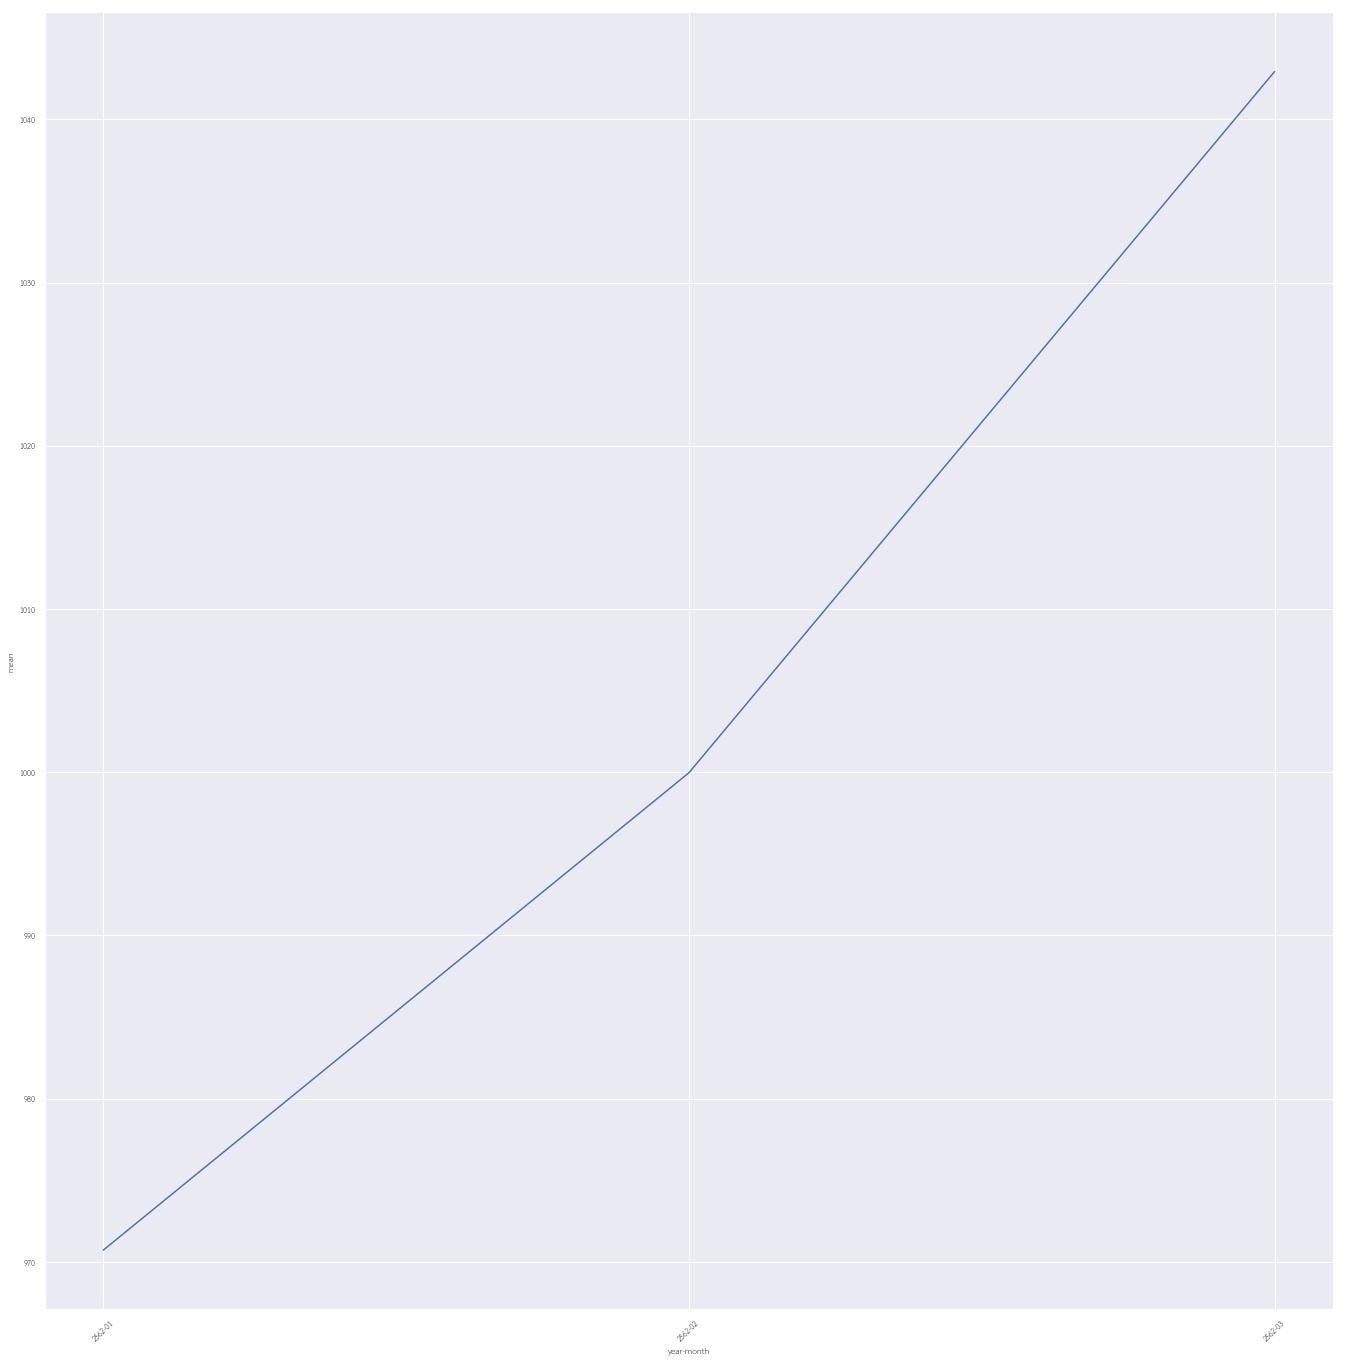

In [86]:
g = sns.relplot(x="year-month", y="mean", ci=None, kind="line", 
            data=input_nation.groupby('year-month')['view'].describe().reset_index(),height=20)
g.set_xticklabels(rotation=45)

In [87]:
input_nation['numToken'].describe()

count    6880.000000
mean        8.030087
std         2.522720
min         1.000000
25%         6.000000
50%         8.000000
75%         9.250000
max        24.000000
Name: numToken, dtype: float64

In [88]:
input_nation['view'].describe()

count    6880.000000
mean     1009.673401
std       658.697222
min       324.000000
25%       534.000000
50%       777.500000
75%      1270.000000
max      3231.000000
Name: view, dtype: float64

In [31]:
MAXVIEW = input_nation['view'].max()
MAXVIEW

3231

## Feature extraction

In [26]:
input_nation_train, input_nation_test = train_test_split(input_nation, test_size=0.2,random_state=42)

/home/burin/.env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


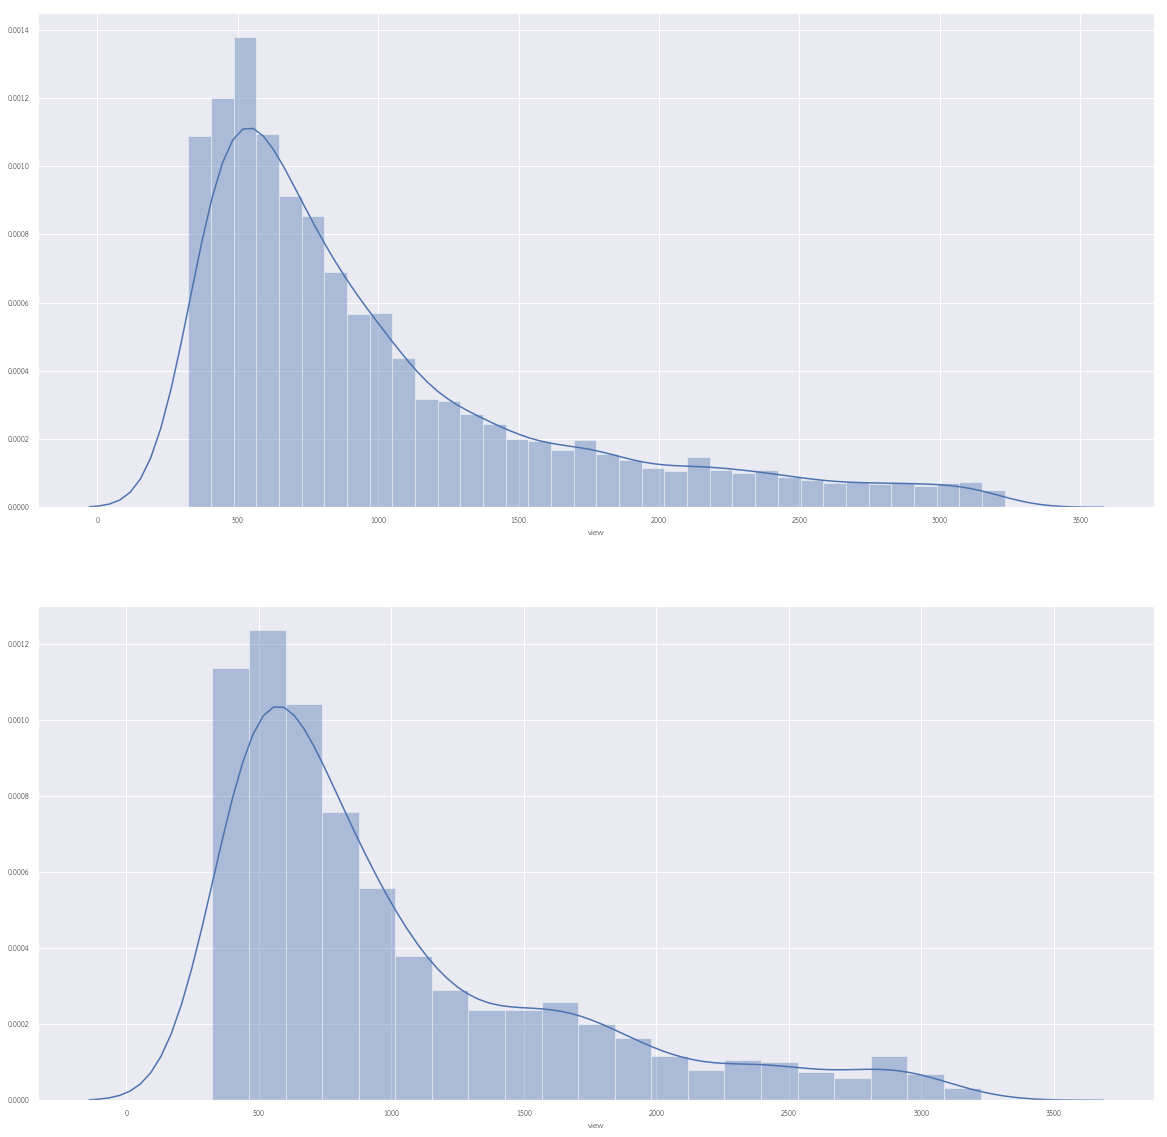

In [27]:
f, axarr = plt.subplots(2, figsize=(20,20))
sns.distplot(input_nation_train['view'],ax=axarr[0])
sns.distplot(input_nation_test['view'],ax=axarr[1])

## Bag of word feature

In [28]:
inputText_train = []
for sent in input_nation_train['token']:
    inputText_train.append(sent.split(','))

In [29]:
inputText_test = []
for sent in input_nation_test['token']:
    inputText_test.append(sent.split(','))

In [32]:
inputLabel_train = []
for view in input_nation_train['view']:
    inputLabel_train.append(view/MAXVIEW)

In [33]:
inputLabel_test = []
for view in input_nation_test['view']:
    inputLabel_test.append(view/MAXVIEW)

In [34]:
print(len(inputText_train),len(inputLabel_train))

5504 5504


In [35]:
print(len(inputText_test),len(inputLabel_test))

1376 1376


In [36]:
words = []
for sentence in inputText_train:
    for word in sentence:
        words.append(word)
        
word_count = list()
word_count.extend(collections.Counter(words).most_common(len(set(words))))
word_count = word_count[:len(word_count)//4]
word_count.append(("UNK",0))

train_word = set()
for i in word_count:
    train_word.add(i[0])

In [37]:
len(word_count)

2120

In [38]:
all_token = set()
for word in train_word:
    all_token.add(word)

In [39]:
all_token = list(all_token)
all_token.insert(0,'for padding')
all_token.insert(1,'UNK')

In [40]:
len(all_token)

2122

In [41]:
token_map = dict(zip(all_token, range(len(all_token))))
token_map_reverse = dict(zip(range(len(all_token)),all_token))

In [42]:
input_data_train = np.asarray(input_nation_train['token'].str.split(','))
input_data_test = np.asarray(input_nation_test['token'].str.split(','))

In [43]:
def count_word(sent):
    global all_token, token_map
    result = np.zeros(len(all_token))
    np_token = np.array(sent)
    str_token, str_token_count = np.unique(np_token, return_counts=True)
    for char, count in zip(str_token, str_token_count):
        if char not in token_map.keys():
            char = 'UNK'
        result[token_map[char]] = count
    return result

In [44]:
temp_train = np.vectorize(count_word, otypes=[object])(input_data_train)
x_f1_train = np.array([[e for e in sl] for sl in temp_train.tolist()])
temp_test = np.vectorize(count_word, otypes=[object])(input_data_test)
x_f1_test = np.array([[e for e in sl] for sl in temp_test.tolist()])

## Numerical feature

In [45]:
cs = MinMaxScaler()

In [46]:
trainContinuous = cs.fit_transform(input_nation_train[['numToken','numChar']])
testContinuous = cs.fit_transform(input_nation_test[['numToken','numChar']])

/home/burin/.env/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/burin/.env/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Cetagorial feature

In [47]:
lb = preprocessing.LabelBinarizer()

In [48]:
zipBinarizer = lb.fit(input_nation["DOW"])
trainCategorical_dow = zipBinarizer.transform(input_nation_train["DOW"])
testCategorical_dow = zipBinarizer.transform(input_nation_test["DOW"])
zipBinarizer = lb.fit(input_nation["month"])
trainCategorical_month = zipBinarizer.transform(input_nation_train["month"])
testCategorical_month = zipBinarizer.transform(input_nation_test["month"])
zipBinarizer = lb.fit(input_nation["year"])
trainCategorical_year = zipBinarizer.transform(input_nation_train["year"])
testCategorical_year = zipBinarizer.transform(input_nation_test["year"])
zipBinarizer = lb.fit(input_nation["hour"])
trainCategorical_hour = zipBinarizer.transform(input_nation_train["hour"])
testCategorical_hour = zipBinarizer.transform(input_nation_test["hour"])
zipBinarizer = lb.fit(input_nation["category"])
trainCategorical_category = zipBinarizer.transform(input_nation_train["category"])
testCategorical_category = zipBinarizer.transform(input_nation_test["category"])
zipBinarizer = lb.fit(input_nation["sentiment"])
trainCategorical_sentiment = zipBinarizer.transform(input_nation_train["sentiment"])
testCategorical_sentiment = zipBinarizer.transform(input_nation_test["sentiment"])

## Concat feature

In [49]:
x_train = np.hstack([x_f1_train, trainContinuous,trainCategorical_dow,trainCategorical_month,trainCategorical_year,
                     trainCategorical_hour,trainCategorical_category,trainCategorical_sentiment])
x_test = np.hstack([x_f1_test, testContinuous,testCategorical_dow,testCategorical_month,testCategorical_year,
                    testCategorical_hour,testCategorical_category,testCategorical_sentiment])

In [506]:
# x_train = np.hstack([x_f1_train,trainCategorical_dow,trainCategorical_hour,trainCategorical_category])
# x_test = np.hstack([x_f1_test,testCategorical_dow,testCategorical_hour,testCategorical_category])

In [523]:
# x_train = np.hstack([x_f1_train, trainContinuous])
# x_test = np.hstack([x_f1_test, testContinuous])

## Prepare data for Keras

In [50]:
x_train=keras.preprocessing.sequence.pad_sequences(x_train, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_test=keras.preprocessing.sequence.pad_sequences(x_test, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)


In [51]:
x_train.shape

(5504, 2180)

In [52]:
print("train size",x_train.shape)
print("test size",x_test.shape)

train size (5504, 2180)
test size (1376, 2180)


In [53]:
y_train = inputLabel_train
y_train = np.asarray(y_train).reshape(-1,1)
y_test = inputLabel_test
y_test = np.asarray(y_test).reshape(-1,1)

In [54]:
# y_train, y_test =  train_test_split(y_train, test_size=0.2,random_state=1)

In [55]:
print("train size",len(y_train))
print("test size",len(y_test))

train size 5504
test size 1376


## Create Model

In [68]:
def create_model():    
    input1 = Input(shape=(x_train.shape[1],))
    x = Dense(1024, activation='relu')(input1)
    x = Dropout(0.5)(x)
    x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(1,activation='linear')(x)
    model = Model(inputs=input1, outputs=x)
    adam  = Adam(lr=0.001)
    model.compile(optimizer=adam,  loss='mean_absolute_percentage_error')
    
    return model


In [69]:
model = create_model()
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 2180)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              2233344   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_17 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024

In [70]:
weight_path='./model_nation_2.h5'
callbacks_list = [
        ModelCheckpoint(
            weight_path,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=1
        )
]

In [71]:
model.fit(x_train, y_train, batch_size=32 ,epochs=50, verbose=1, validation_split=0.2,callbacks=callbacks_list)

Train on 4403 samples, validate on 1101 samples
Epoch 1/50
4403/4403 [==============================] - 6s 1ms/step - loss: 301.1189 - val_loss: 105.0362

Epoch 00001: val_loss improved from inf to 105.03619, saving model to ./model_nation_2.h5
Epoch 2/50
4403/4403 [==============================] - 3s 609us/step - loss: 158.8630 - val_loss: 57.6535

Epoch 00002: val_loss improved from 105.03619 to 57.65350, saving model to ./model_nation_2.h5
Epoch 3/50
4403/4403 [==============================] - 3s 614us/step - loss: 102.8903 - val_loss: 45.0171

Epoch 00003: val_loss improved from 57.65350 to 45.01710, saving model to ./model_nation_2.h5
Epoch 4/50
4403/4403 [==============================] - 3s 626us/step - loss: 77.5112 - val_loss: 41.4930

Epoch 00004: val_loss improved from 45.01710 to 41.49300, saving model to ./model_nation_2.h5
Epoch 5/50
4403/4403 [==============================] - 3s 629us/step - loss: 61.2752 - val_loss: 39.3052

Epoch 00005: val_loss improved from 41.493

4403/4403 [==============================] - 3s 626us/step - loss: 18.2609 - val_loss: 41.4984

Epoch 00049: val_loss did not improve from 37.34169
Epoch 50/50
4403/4403 [==============================] - 3s 641us/step - loss: 18.5483 - val_loss: 41.2912

Epoch 00050: val_loss did not improve from 37.34169


In [60]:
model.fit(x_train, y_train, batch_size=32 ,epochs=50, verbose=1, validation_split=0.2,callbacks=callbacks_list)

Train on 4403 samples, validate on 1101 samples
Epoch 1/50
4403/4403 [==============================] - 3s 602us/step - loss: 52.0363 - val_loss: 38.0127

Epoch 00001: val_loss improved from 38.27204 to 38.01274, saving model to ./model_nation_1.h5
Epoch 2/50
4403/4403 [==============================] - 3s 600us/step - loss: 52.3423 - val_loss: 38.2964

Epoch 00002: val_loss did not improve from 38.01274
Epoch 3/50
4403/4403 [==============================] - 3s 632us/step - loss: 48.3777 - val_loss: 38.6822

Epoch 00003: val_loss did not improve from 38.01274
Epoch 4/50
4403/4403 [==============================] - 3s 612us/step - loss: 50.0844 - val_loss: 39.2608

Epoch 00004: val_loss did not improve from 38.01274
Epoch 5/50
4403/4403 [==============================] - 3s 635us/step - loss: 48.5942 - val_loss: 38.6518

Epoch 00005: val_loss did not improve from 38.01274
Epoch 6/50
4403/4403 [==============================] - 3s 633us/step - loss: 48.6076 - val_loss: 37.8227

Epoch 00

In [72]:
weight_model='./model_nation_2.h5'
model = create_model()
model.load_weights(weight_model)
# model._make_predict_function()
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 2180)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              2233344   
_________________________________________________________________
dropout_17 (Dropout)         (None, 1024)              0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_22 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 256)               1024

## Evaluate Model

In [73]:
y_pred = model.predict(x_test)

In [74]:
y_pred2 = y_pred.clip(min=0)

In [75]:
def evaluate(preds, testY):
    diff = preds.flatten() - testY
    percentDiff = (diff / testY) * 100
    absPercentDiff = np.abs(percentDiff)
    mean = np.mean(absPercentDiff)
    std = np.std(absPercentDiff)
    print(mean,std)

In [76]:
evaluate(y_pred,y_test)

46.827653767827265 43.06661801659503


In [77]:
for i in range(50):
    print(y_test[i],y_pred[i])
    print(y_test[i]*MAXVIEW,y_pred[i]*MAXVIEW)

[0.16186939] [0.1818725]
[523.] [587.63007]
[0.36861653] [0.23485976]
[1191.] [758.8319]
[0.86969978] [0.32497972]
[2810.] [1050.0095]
[0.70597338] [0.22858214]
[2281.] [738.5489]
[0.24141133] [0.20349729]
[780.] [657.49976]
[0.11234912] [0.2994001]
[363.] [967.3617]
[0.51098731] [0.17055547]
[1651.] [551.06476]
[0.19529557] [0.1634721]
[631.] [528.17834]
[0.12411018] [0.2761202]
[401.] [892.14435]
[0.2909316] [0.17955668]
[940.] [580.14764]
[0.23243578] [0.17028072]
[751.] [550.177]
[0.3271433] [0.16312763]
[1057.] [527.06537]
[0.31909626] [0.2636716]
[1031.] [851.923]
[0.26957598] [0.2291522]
[871.] [740.39075]
[0.28288456] [0.18168625]
[914.] [587.02826]
[0.81429898] [0.1571295]
[2631.] [507.6854]
[0.46951408] [0.2443578]
[1517.] [789.52]
[0.10677809] [0.15956527]
[345.] [515.55536]
[0.21293717] [0.18202502]
[688.] [588.1228]
[0.49829774] [0.21441408]
[1610.] [692.77185]
[0.20612813] [0.2436023]
[666.] [787.07904]
[0.73382854] [0.36962184]
[2371.] [1194.2482]
[0.10523058] [0.1644504